In [57]:
#import necessary packages 

import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix ,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB









In [2]:
#Read the file and loading into the code
df = pd.read_csv('G:/CS/4th/data_science/data - Copy.csv')
#View the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#replacing the missing values in compactness_mean by mean value
df["compactness_mean"] = df["compactness_mean"].replace(np.NaN, df["compactness_mean"].mean())
print(df["compactness_mean"][:10])

df["Unnamed: 32"] = df["Unnamed: 32"].replace(np.NaN, 1)
print(df["Unnamed: 32"][:10])

df["compactness_worst"] = df["compactness_worst"].replace(np.NaN, df["compactness_worst"].mean())
print(df["compactness_worst"][:10])

df["concavity_worst"] = df["concavity_worst"].replace(np.NaN, df["concavity_worst"].mean())
print(df["concavity_worst"][:10])

0    0.27760
1    0.07864
2    0.15990
3    0.28390
4    0.13280
5    0.17000
6    0.10900
7    0.16450
8    0.19320
9    0.23960
Name: compactness_mean, dtype: float64
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Unnamed: 32, dtype: float64
0    0.6656
1    0.1866
2    0.4245
3    0.8663
4    0.2050
5    0.5249
6    0.2576
7    0.3682
8    0.5401
9    1.0580
Name: compactness_worst, dtype: float64
0    0.7119
1    0.2416
2    0.4504
3    0.6869
4    0.4000
5    0.5355
6    0.3784
7    0.2678
8    0.5390
9    1.1050
Name: concavity_worst, dtype: float64


0    0.14710
1    0.07017
2    0.12790
3    0.10520
4    0.10430
5    0.08089
6    0.07400
7    0.05985
8    0.09353
9    0.08543
Name: concave points_mean, dtype: float64


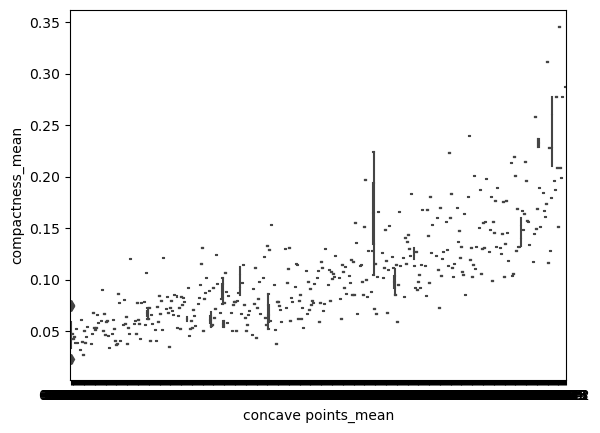

In [4]:
#replacing the missing values in concave points_mean by mean value
df["concave points_mean"] = df["concave points_mean"].replace(np.NaN, df["concave points_mean"].mean())
print(df["concave points_mean"][:10])

#knowing number of duplicate
df.duplicated().sum()

#delete the duplication
df.drop_duplicates(inplace=True)
df.duplicated().sum()

#drawing a boxplot to detect outliers of concave points_mean
sns.boxplot(x=df['concave points_mean'],y=df["compactness_mean"])
plt.show()




C:\Users\mcc\AppData\Local\Temp\ipykernel_13524\247714589.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x ='radius_mean',


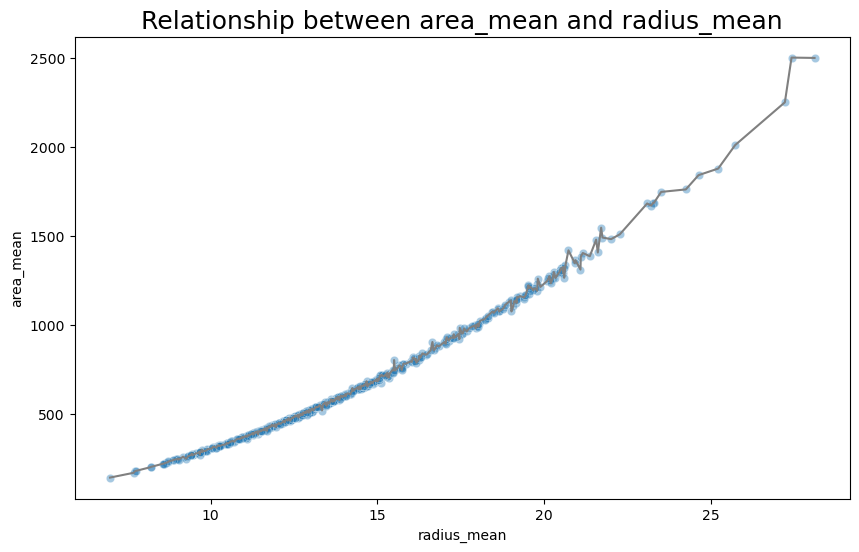

In [5]:
plt.figure(figsize=(10, 6))#Scatter plot for relation between radius_mean and area_mean
ax = sns.scatterplot(x ='radius_mean',
                    y = df['area_mean'],
                    data = df,
                     palette = ["green", "red", "coral", "blue"],
                     legend="full",
                     alpha = 0.4
                    )
max_pressure = df.groupby("radius_mean")["area_mean"].max() #Making a line plot of max ages 
sns.lineplot(data = max_pressure, ax = ax.axes, color="grey")
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.title("Relationship between area_mean and radius_mean", fontsize = 18)
plt.show()

In [10]:
# Load dataset from sklearn
bc = datasets.load_breast_cancer()
# For easy of manipulation, convert dataset to pandas dataframe
bcdf = pd.DataFrame(bc.data, columns= bc.feature_names)


In [14]:
# For easy of manipulation, convert dataset to pandas dataframe
bcdf = pd.DataFrame(bc.data, columns= bc.feature_names)

In [15]:
# Append dataframe containing tumor features with diagnostic outcomes.
# This labels will be used for supervised learning.
bcdf['Diagnosis'] = bc.target

In [16]:
# For differential diagnosis visual comparisons.
# create to dataframes - one for positive, one for negative

bcdf_n = bcdf[bcdf['Diagnosis'] == 0]
bcdf_y = bcdf[bcdf['Diagnosis'] == 1]

# Create list of features related to mean tumor characteristics
features_means =list(bcdf.columns[0:10])

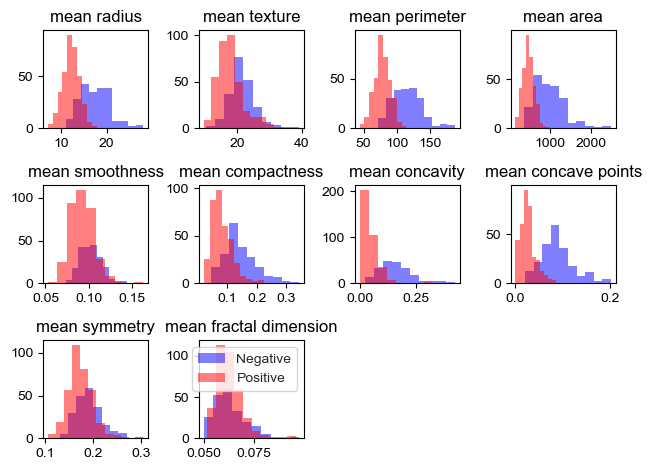

In [17]:
# Visualize tumor characteristics for positive and negatives diagnoses 


# Instantiate figure object
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(bcdf.columns[0:10])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for comparisons.
    ax.hist(bcdf_n[b], label = 'Negative', stacked = True, alpha=0.5, color= 'b')
    ax.hist(bcdf_y[b], label= 'Positive', stacked = True, alpha=0.5, color= 'r')
    ax.set_title(b)


sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

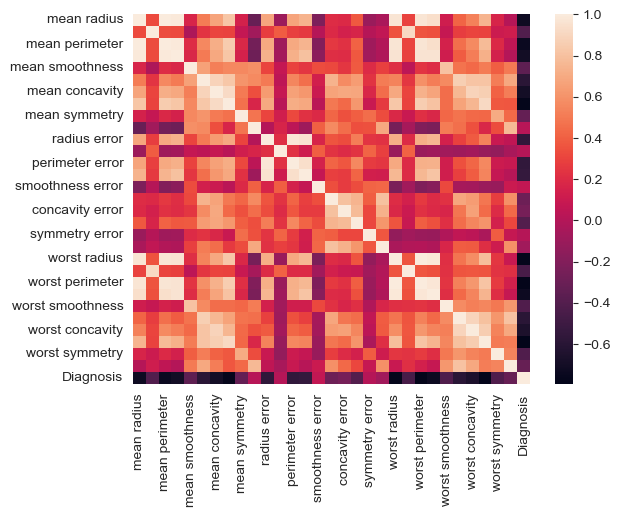

In [18]:
# Quick visualization of relationships between features and diagnoses

sns.heatmap(bcdf.corr())
sns.set_style("whitegrid")
plt.show()

In [19]:
# Split data into testing and training set. Use 80% for training
X_train, X_test, y_train, y_test = train_test_split(bcdf.iloc[:,:-1], bcdf['Diagnosis'], train_size = .8 )

In [20]:
print(X_train.shape[0])
print(X_test.shape[0])

455
114


In [27]:
# Applying naive Bayes
NBclassifier = GaussianNB()

# Train the model:
NBmodel = NBclassifier.fit(X_train, y_train)

# Making predictions by using pred() function:
NBpreds = NBclassifier.predict(X_test)
print("The predictions are:\n", NBpreds[:15])

# Finding accuracy of our Naive Bayes classifier:
from sklearn.metrics import accuracy_score
print("Accuracy of our classifier is:", accuracy_score(y_test, NBpreds) *100)

The predictions are:
 [1 1 1 1 0 1 1 0 1 1 0 1 0 1 0]
Accuracy of our classifier is: 96.49122807017544


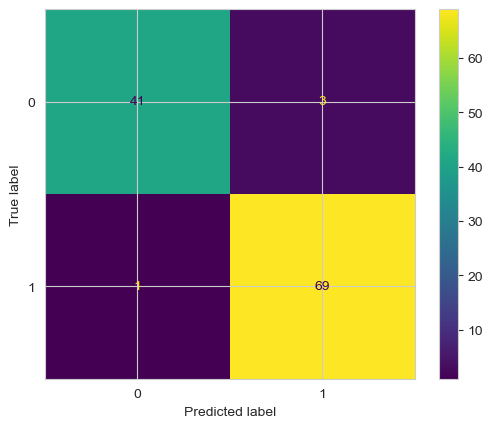

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, NBpreds)
plt.show()

In [34]:
print('Precision score: ', format(precision_score(y_test, NBpreds)))
print('Recall score: ', format(recall_score(y_test, NBpreds)))
print('F1 score: ', format(f1_score(y_test, NBpreds)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, NBpreds)))

Precision score:  0.9583333333333334
Recall score:  0.9857142857142858
F1 score:  0.971830985915493

 Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.96      0.99      0.97        70

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [35]:
dt=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.015)
dt.fit(X_train,y_train)
dt_predictions=dt.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, dt_predictions),'%'))

Accuracy score:  91.228070%


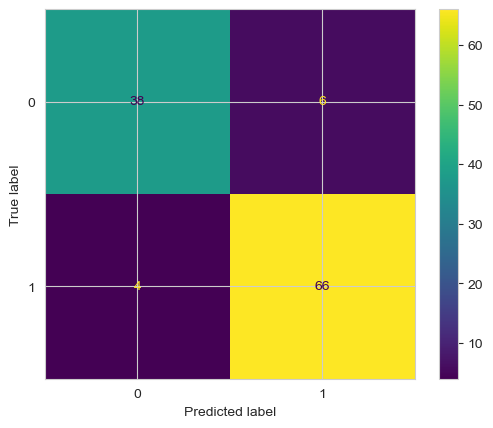

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_predictions)
plt.show()

In [37]:
print('Precision score: ', format(precision_score(y_test, dt_predictions)))
print('Recall score: ', format(recall_score(y_test, dt_predictions)))
print('F1 score: ', format(f1_score(y_test, dt_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, dt_predictions)))

Precision score:  0.9166666666666666
Recall score:  0.9428571428571428
F1 score:  0.9295774647887323

 Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        44
           1       0.92      0.94      0.93        70

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



In [38]:
gini= DecisionTreeClassifier( criterion='gini', ccp_alpha = 0.015) 
gini.fit(X_train, y_train)    
gini_predictions = dt.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, gini_predictions),'%'))

Accuracy score:  91.228070%


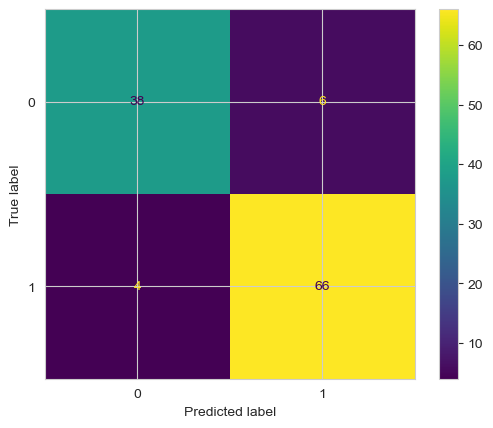

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, gini_predictions)
plt.show()

In [40]:
print('Precision score: ', format(precision_score(y_test,  gini_predictions)))
print('Recall score: ', format(recall_score(y_test,  gini_predictions)))
print('F1 score: ', format(f1_score(y_test,  gini_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test,  gini_predictions)))

Precision score:  0.9166666666666666
Recall score:  0.9428571428571428
F1 score:  0.9295774647887323

 Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        44
           1       0.92      0.94      0.93        70

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



In [43]:
lda_m= LDA()
lda = lda_m.fit(X_train,y_train)
lda_predictions=lda.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, lda_predictions),'%'))

Accuracy score:  95.614035%


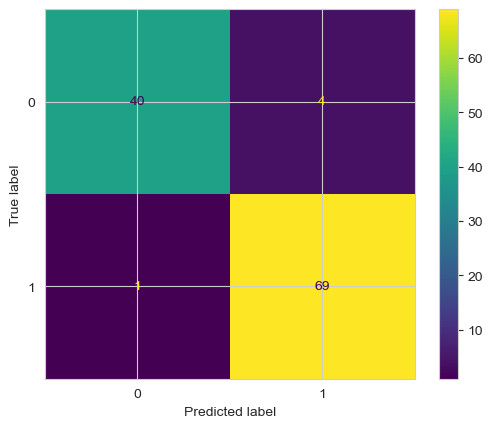

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, lda_predictions)
plt.show()

In [45]:
print('Precision score: ', format(precision_score(y_test, lda_predictions)))
print('Recall score: ', format(recall_score(y_test,  lda_predictions)))
print('F1 score: ', format(f1_score(y_test, lda_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, lda_predictions)))

Precision score:  0.9452054794520548
Recall score:  0.9857142857142858
F1 score:  0.9650349650349651

 Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.95      0.99      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [46]:
log_m = LogisticRegression(max_iter=30)
log= log_m.fit(X_train,y_train)
log_predictions=log.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, log_predictions),'%'))

Accuracy score:  95.614035%


C:\Users\mcc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


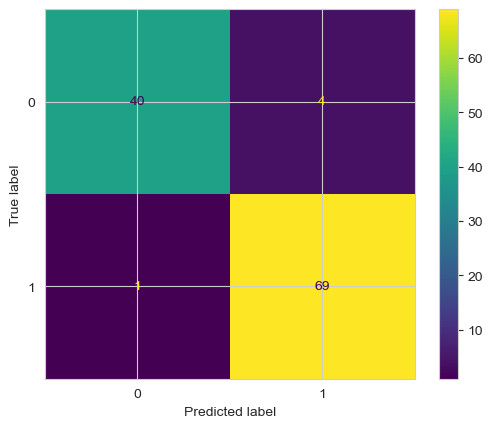

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, log_predictions)
plt.show()

In [48]:
print('Precision score: ', format(precision_score(y_test,  log_predictions)))
print('Recall score: ', format(recall_score(y_test,  log_predictions)))
print('F1 score: ', format(f1_score(y_test, log_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, log_predictions)))

Precision score:  0.9452054794520548
Recall score:  0.9857142857142858
F1 score:  0.9650349650349651

 Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.95      0.99      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [49]:
knn_m =KNeighborsClassifier(n_neighbors=97)
knn_m.fit(X_train, y_train)
knn_predictions = knn_m.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, knn_predictions),'%'))

Accuracy score:  92.982456%


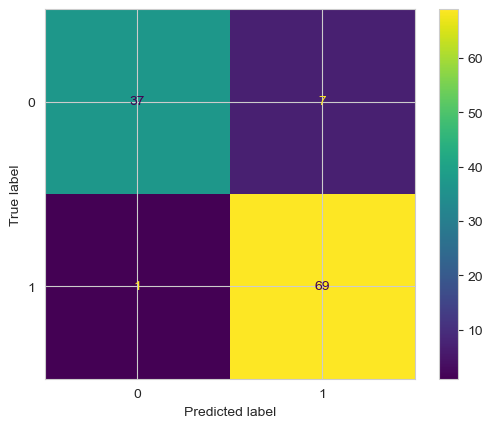

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions)
plt.show()

In [51]:
print('Precision score: ', format(precision_score(y_test, knn_predictions)))
print('Recall score: ', format(recall_score(y_test, knn_predictions)))
print('F1 score: ', format(f1_score(y_test, knn_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, knn_predictions)))

Precision score:  0.9078947368421053
Recall score:  0.9857142857142858
F1 score:  0.9452054794520548

 Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90        44
           1       0.91      0.99      0.95        70

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [54]:
neural_m = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
neural_m.fit(X_train, y_train)
neural_predictions =neural_m.predict(X_test)
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, neural_predictions),'%'))

Accuracy score:  83.333333%


C:\Users\mcc\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


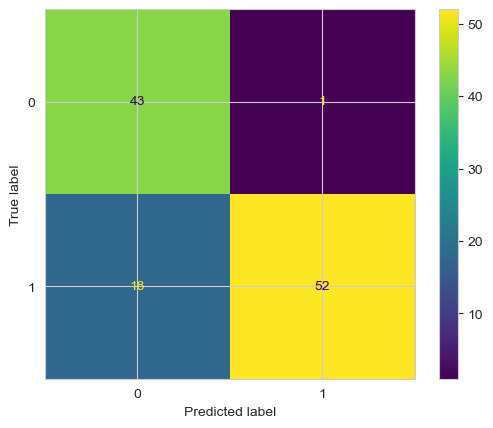

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, neural_predictions)
plt.show()

In [56]:
print('Precision score: ', format(precision_score(y_test, neural_predictions)))
print('Recall score: ', format(recall_score(y_test, neural_predictions)))
print('F1 score: ', format(f1_score(y_test,neural_predictions)))
from sklearn.metrics import classification_report
print('\n Classification report: \n', format(classification_report (y_test, neural_predictions)))

Precision score:  0.9811320754716981
Recall score:  0.7428571428571429
F1 score:  0.8455284552845528

 Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.98      0.82        44
           1       0.98      0.74      0.85        70

    accuracy                           0.83       114
   macro avg       0.84      0.86      0.83       114
weighted avg       0.87      0.83      0.84       114



In [ ]:
#Arwa Fawzy 320210071